# **REGRESSION MODELS**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
df = pd.read_csv('../Data/clean_data.csv')

In [93]:
print(df)

        No  Price    Area  Bedrooms  WCs  Floors  Legal_status  Frontage  \
0        1   13.5   44.00       3.0  3.0     5.0          -1.0       1.0   
1        2    8.7   45.00       3.0  3.0     4.0           1.0       0.0   
2        3    9.3   40.00       4.0  4.0     4.0           1.0       0.0   
3        4   15.0  151.69       5.0  4.0     3.0          -1.0       1.0   
4        5   16.0  151.69       5.0  4.0     3.0          -1.0       1.0   
...    ...    ...     ...       ...  ...     ...           ...       ...   
5703  5704    9.5   61.40       4.0  4.0     3.0          -1.0       1.0   
5704  5705   13.5  104.70       3.0  4.0     4.0           1.0       0.0   
5705  5706    6.8   68.00       4.0  4.0     3.0           1.0       0.0   
5706  5707    6.5   62.50       3.0  4.0     2.0          -1.0      -1.0   
5707  5708    9.5  113.00       5.0  3.0     4.0           1.0      -1.0   

      Price_per_sqm  District_encoded  Month  
0              0.31                 0   

In [94]:
# Split the dataset into features (X) and the target variable (Y).
X = df.drop(columns = ['No', 'Price'])
y = df['Price']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
# Split dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Linear Regression**

In [96]:
linear = LinearRegression(fit_intercept = True)
linear.fit(X_train, y_train)

LinearRegression()

In [97]:
y_test_pred = linear.predict(X_test)

In [98]:
print("Linear Regression - MSE:", mean_squared_error(y_test, y_test_pred))
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_test_pred))
print("Linear Regression - R^2:", r2_score(y_test, y_test_pred))

Linear Regression - MSE: 2.7464229470005486
Linear Regression - MAE: 1.0741689835910744
Linear Regression - R^2: 0.7605921900256918


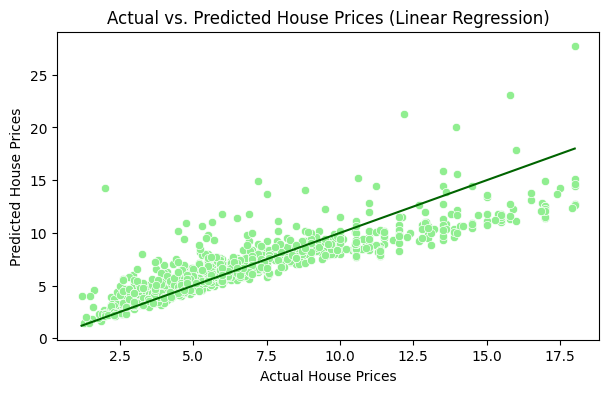

In [114]:
# Create a scatter plot
plt.figure(figsize = (7, 4))
sns.scatterplot(x = y_test, y = y_test_pred, color='lightgreen',)

# Plot a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'darkgreen', linestyle = '-')

plt.title('Actual vs. Predicted House Prices (Linear Regression)')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(False)
plt.show()

### **Ridge Regression**

In [100]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [101]:
ridge_y_pred = ridge.predict(X_test)

print("Ridge Regression - MSE:", mean_squared_error(y_test, ridge_y_pred))
print("Ridge Regression - MAE:", mean_absolute_error(y_test, ridge_y_pred))
print("Ridge Regression - R^2:", r2_score(y_test, ridge_y_pred))

Ridge Regression - MSE: 2.845485149119936
Ridge Regression - MAE: 1.1214860636766162
Ridge Regression - R^2: 0.751956861338777


In [102]:
# Ridge Regression với GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_y_pred_best = best_ridge.predict(X_test)

print("Best Ridge Regression - MSE:", mean_squared_error(y_test, ridge_y_pred_best))
print("Best Ridge Regression - MAE:", mean_absolute_error(y_test, ridge_y_pred_best))
print("Best Ridge Regression - R^2:", r2_score(y_test, ridge_y_pred_best))

Best Ridge Regression - MSE: 2.7548359178078896
Best Ridge Regression - MAE: 1.0789200485825547
Best Ridge Regression - R^2: 0.7598588248611737


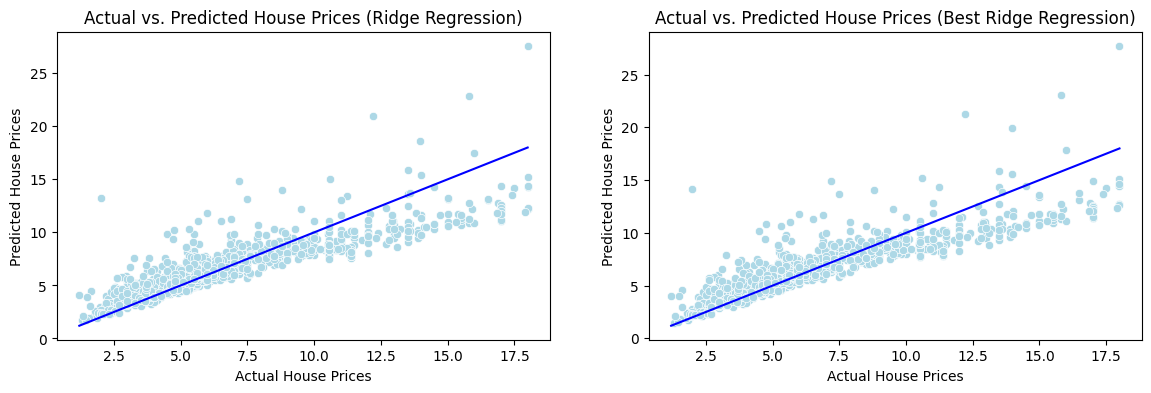

In [111]:
# Create a scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot for Lasso Regression
sns.scatterplot(x = y_test, y = ridge_y_pred, color = 'lightblue', ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue', linestyle = '-')
axes[0].set_title('Actual vs. Predicted House Prices (Ridge Regression)')
axes[0].set_xlabel('Actual House Prices')
axes[0].set_ylabel('Predicted House Prices')

# Plot for Best Lasso Regression
sns.scatterplot(x = y_test, y = ridge_y_pred_best, color = 'lightblue', ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue', linestyle = '-')
axes[1].set_title('Actual vs. Predicted House Prices (Best Ridge Regression)')
axes[1].set_xlabel('Actual House Prices')
axes[1].set_ylabel('Predicted House Prices')


plt.grid(False)
plt.show()

### **Lasso Regression**

In [104]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [105]:
lasso_y_pred = lasso.predict(X_test)

print("Lasso Regression - MSE:", mean_squared_error(y_test, lasso_y_pred))
print("Lasso Regression - MAE:", mean_absolute_error(y_test, lasso_y_pred))
print("Lasso Regression - R^2:", r2_score(y_test, lasso_y_pred))

Lasso Regression - MSE: 7.675309084964879
Lasso Regression - MAE: 2.0834016973048586
Lasso Regression - R^2: 0.3309373776846084


In [106]:
# Lasso Regression với GridSearchCV
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_y_pred_best = best_lasso.predict(X_test)

print("Best Lasso Regression - MSE:", mean_squared_error(y_test, lasso_y_pred_best))
print("Best Lasso Regression - MAE:", mean_absolute_error(y_test, lasso_y_pred_best))
print("Best Lasso Regression - R^2:", r2_score(y_test, lasso_y_pred_best))


Best Lasso Regression - MSE: 2.8704350313639684
Best Lasso Regression - MAE: 1.1314303068501774
Best Lasso Regression - R^2: 0.7497819608291216


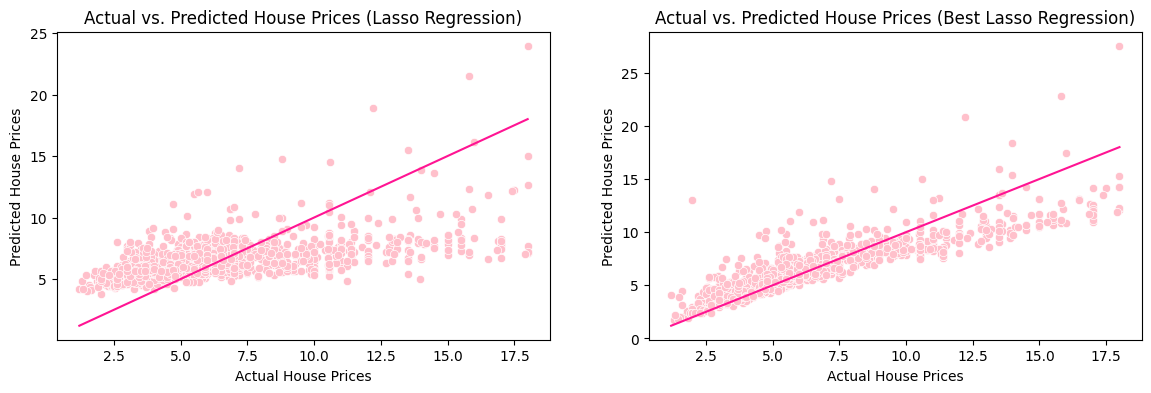

In [107]:
# Create a scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot for Lasso Regression
sns.scatterplot(x = y_test, y = lasso_y_pred, color = 'pink', ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'deeppink', linestyle = '-')
axes[0].set_title('Actual vs. Predicted House Prices (Lasso Regression)')
axes[0].set_xlabel('Actual House Prices')
axes[0].set_ylabel('Predicted House Prices')

# Plot for Best Lasso Regression
sns.scatterplot(x = y_test, y = lasso_y_pred_best, color = 'pink', ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'deeppink', linestyle = '-')
axes[1].set_title('Actual vs. Predicted House Prices (Best Lasso Regression)')
axes[1].set_xlabel('Actual House Prices')
axes[1].set_ylabel('Predicted House Prices')


plt.grid(False)
plt.show()

### **Compare 3 Regression models**

In [108]:
# Tạo bảng so sánh
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_test, ridge_y_pred_best), mean_absolute_error(y_test, lasso_y_pred_best)],
    'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, ridge_y_pred_best), mean_squared_error(y_test, lasso_y_pred_best)],
    'R^2': [r2_score(y_test, y_test_pred), r2_score(y_test, ridge_y_pred_best), r2_score(y_test, lasso_y_pred_best)]
})

print(results)

               Model       MAE       MSE       R^2
0  Linear Regression  1.074169  2.746423  0.760592
1   Ridge Regression  1.078920  2.754836  0.759859
2   Lasso Regression  1.131430  2.870435  0.749782
